In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from __bazaPodatkov import bazaPodatkov

In [2]:
# Nalaganje baze podatkov slik
(X_train, y_train), (X_test, y_test), class_num = bazaPodatkov()
clabel = ["letalo","avto","ptica","maček","jelen","pes","žaba","konj","ladja","tovornjak"] 

In [3]:
# Nalaganje že natreniranega modela
model = keras.models.load_model("cifar-cnn")
# Ocenitev natančnosti modela
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

2023-08-17 13:29:27.393877: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Accuracy: 83.08%


[9786, 2604, 6246, 6022, 3543, 2611, 7904, 7070, 3323, 2967, 163, 2121, 9194, 2179, 4781, 8431, 2841, 7112, 410, 2037, 1131, 8538, 690, 2822, 9407, 622, 7802, 6806, 634, 2879, 3, 2025, 6324, 2018, 1831, 7714, 8900, 3179, 1880, 8597]
2/2 [==============================] - 0s 9ms/step
(40, 10)


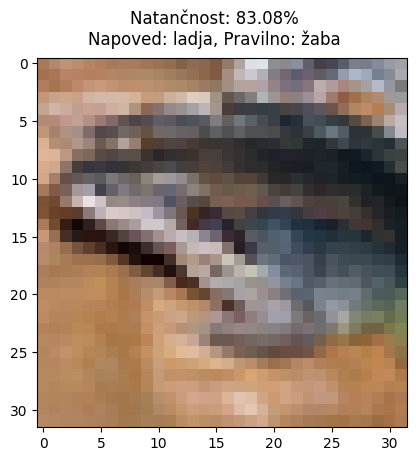

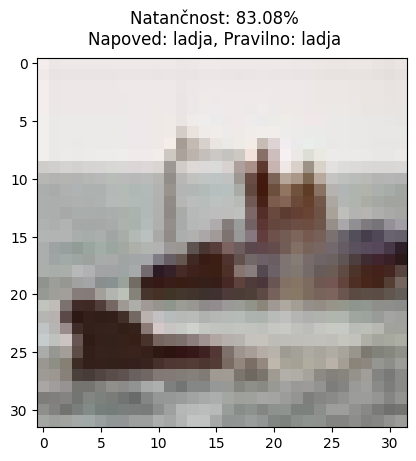

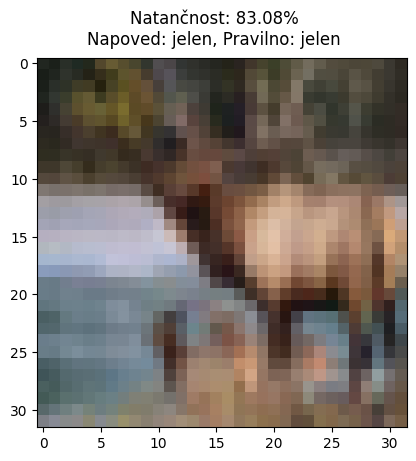

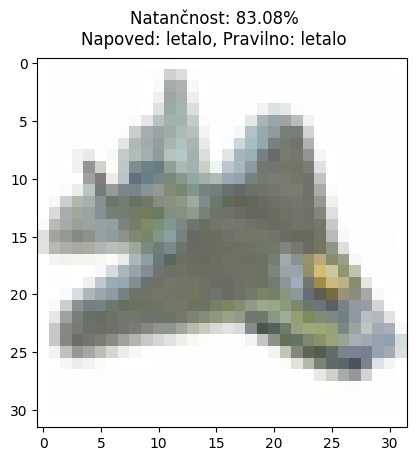

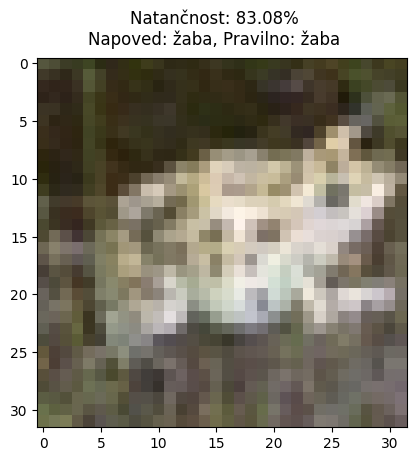

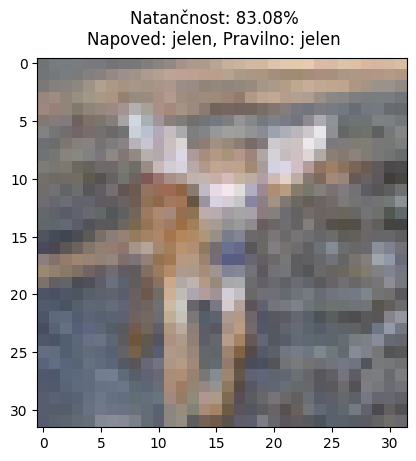

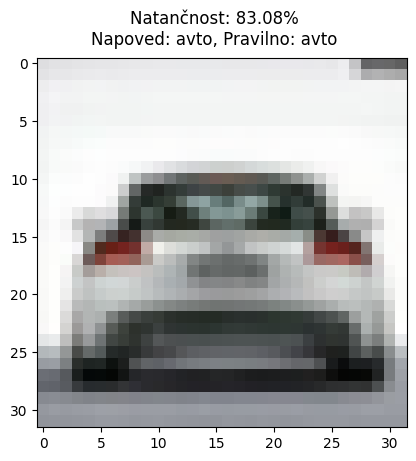

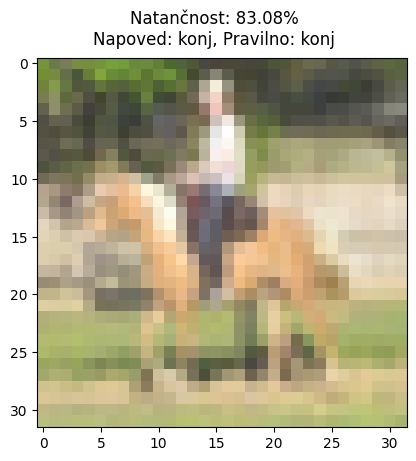

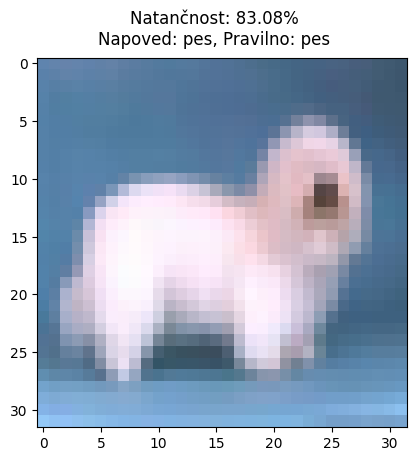

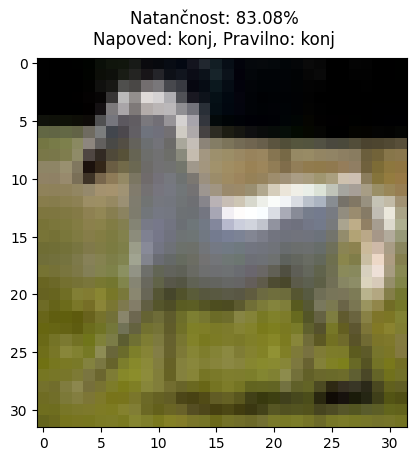

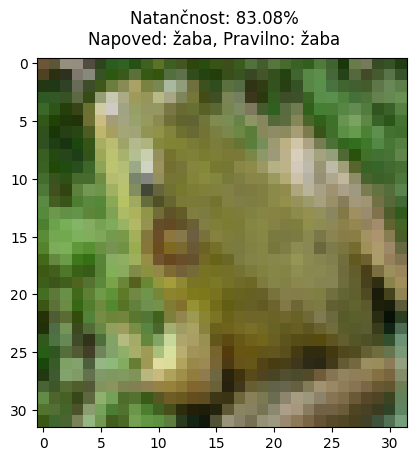

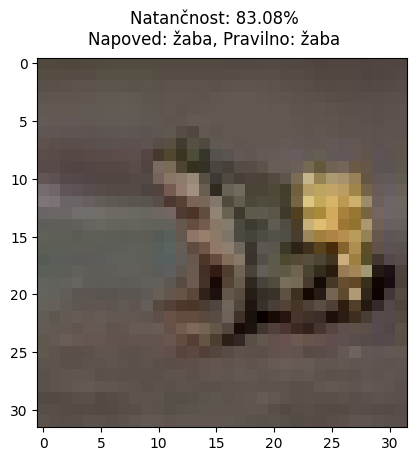

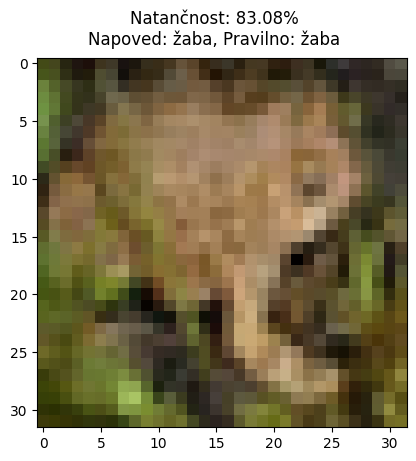

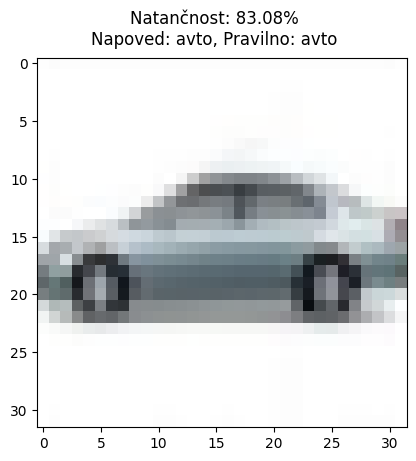

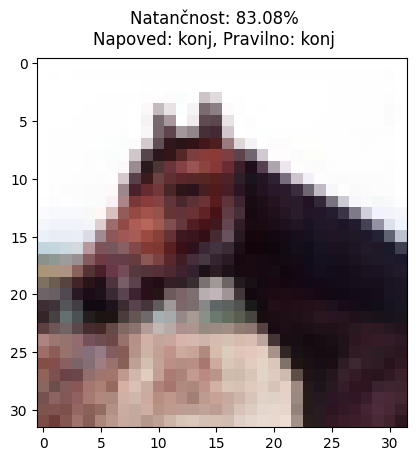

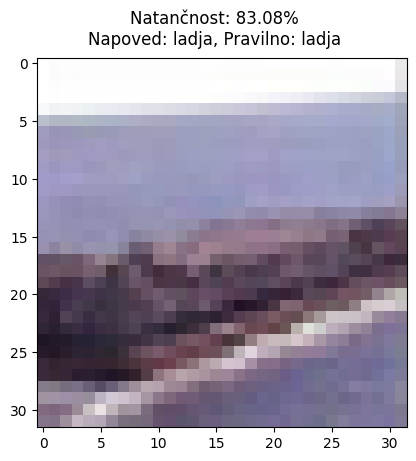

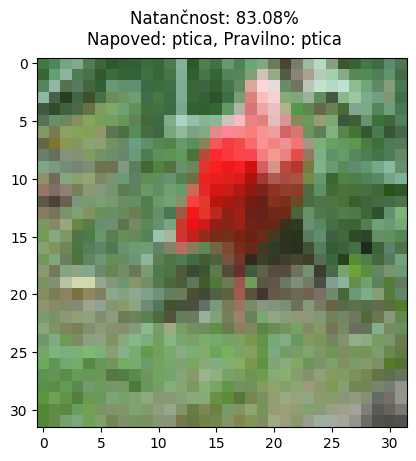

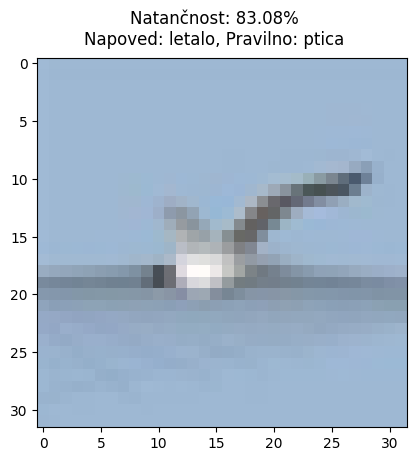

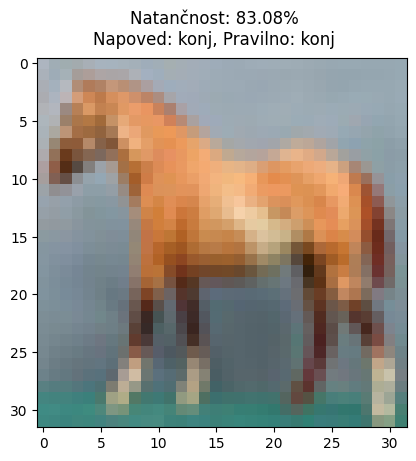

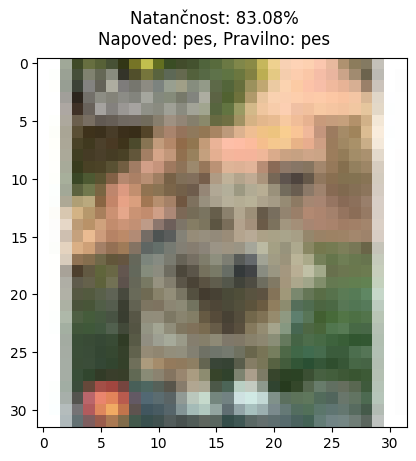

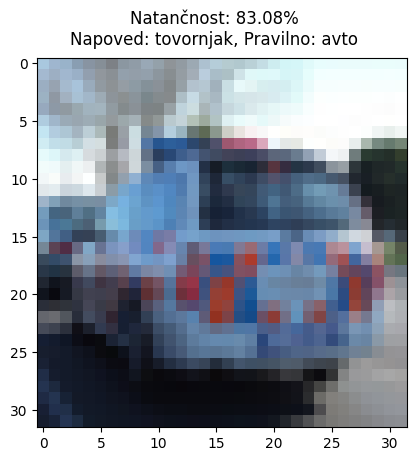

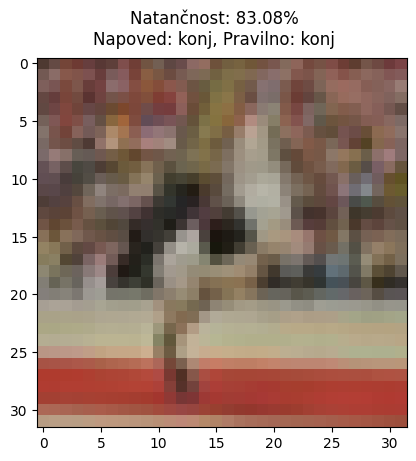

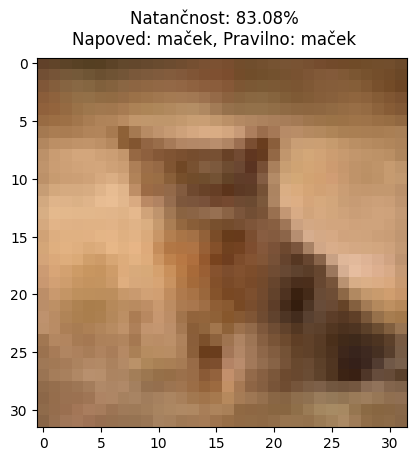

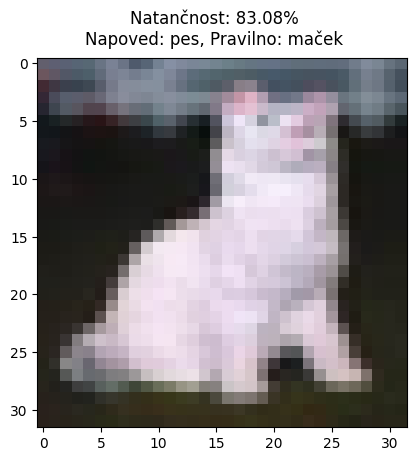

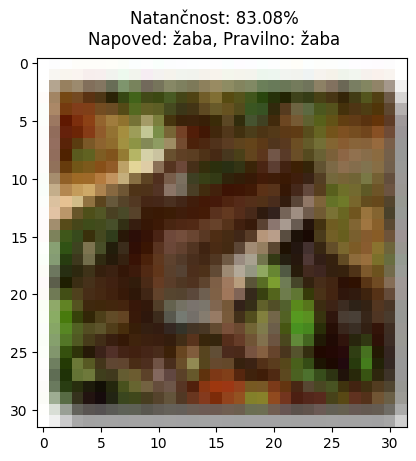

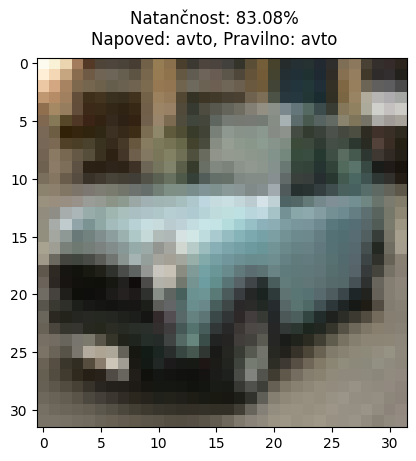

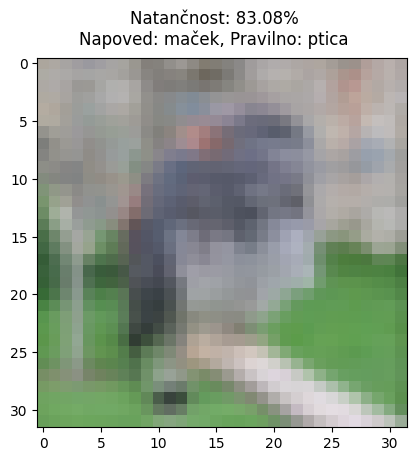

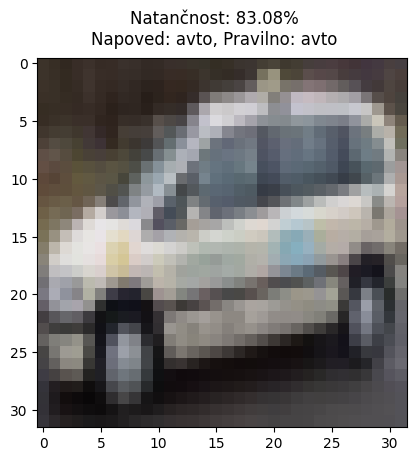

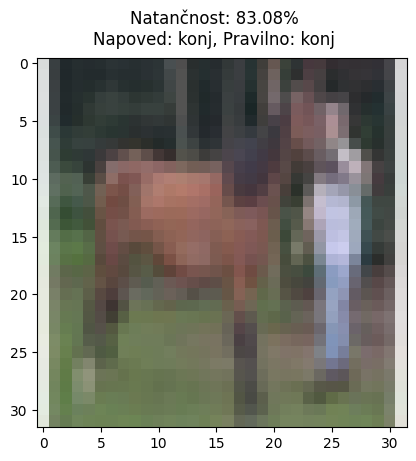

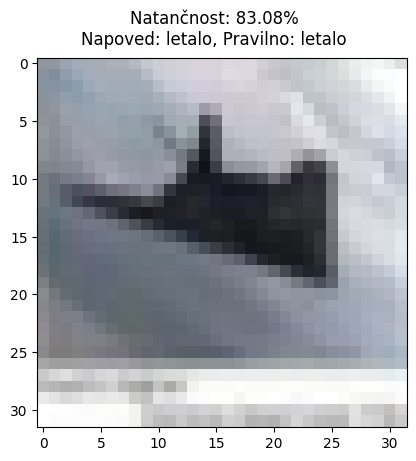

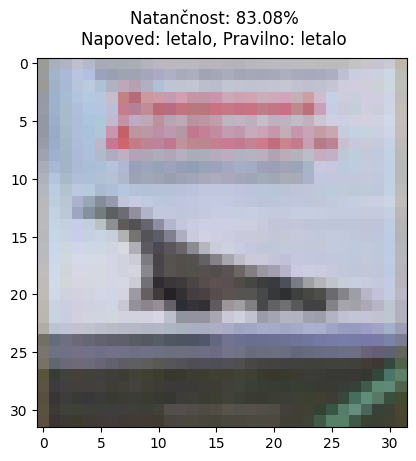

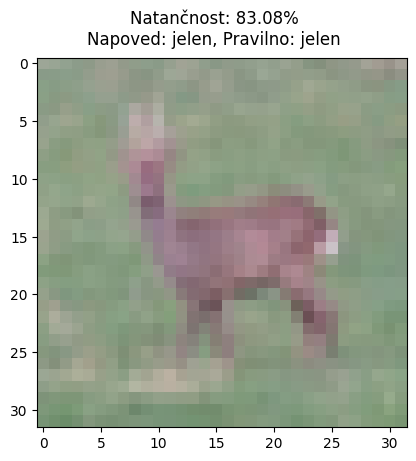

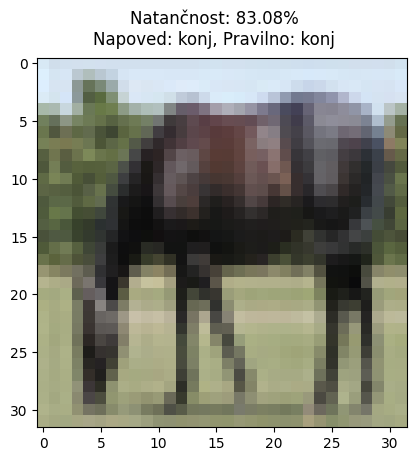

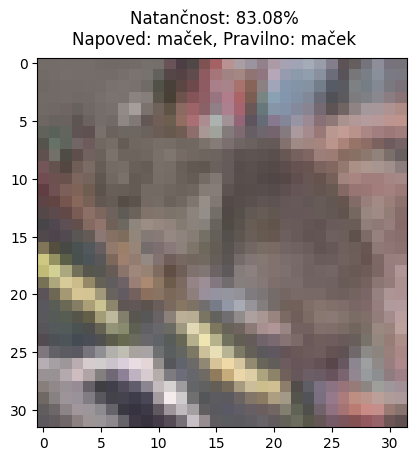

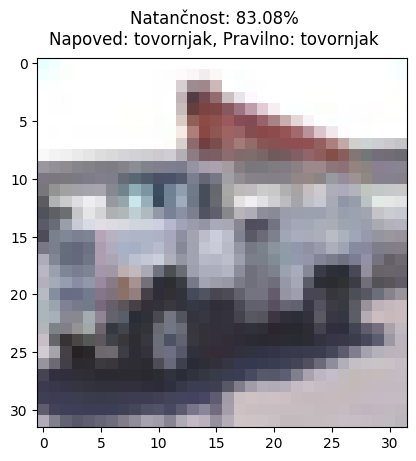

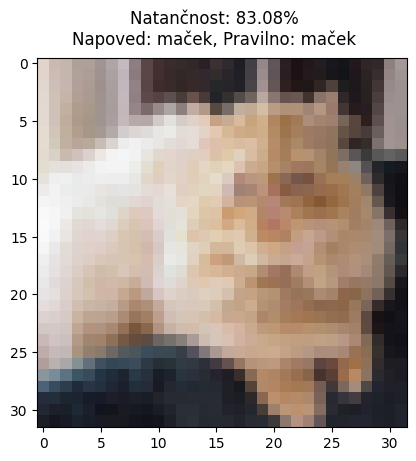

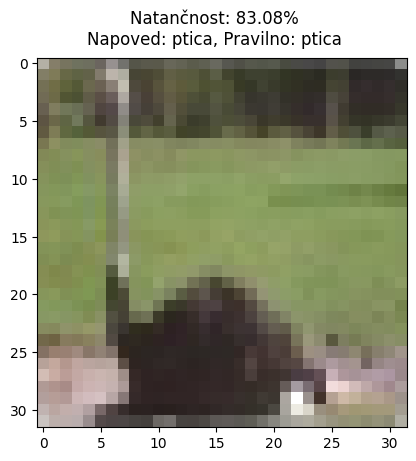

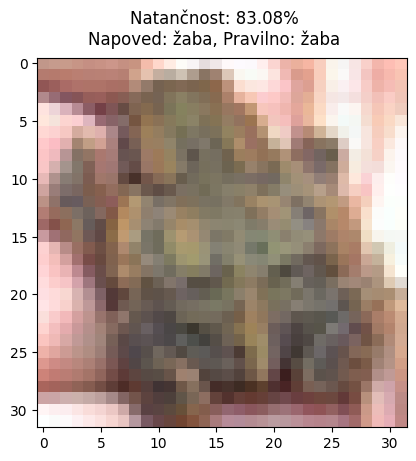

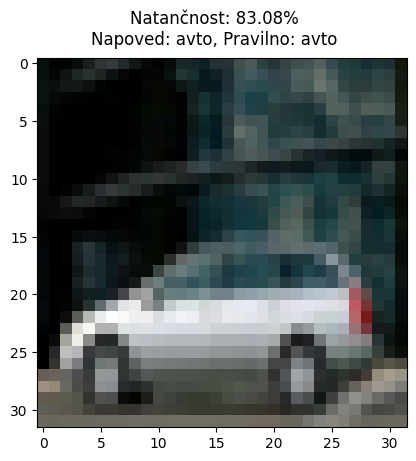

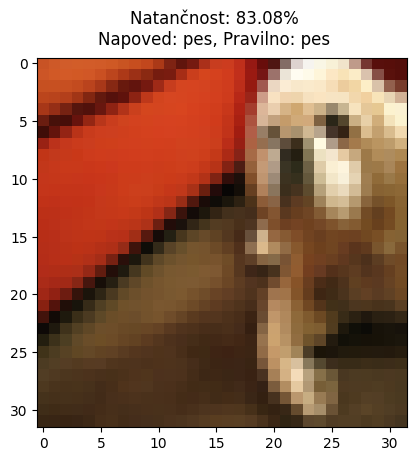

In [4]:
import random

n = 40
indexs = random.sample(range(len(X_test)), n)
print(indexs)

# Poglejmo katere slike model prepozna ali ne
# CIFAR-10 baza: https://www.cs.toronto.edu/~kriz/cifar.html

X_sample = X_test[indexs]
y_sample = y_test[indexs]
predictions = model.predict(X_sample)
print(predictions.shape)
for index in range(n):
    predLabel = clabel[np.argmax(predictions[index])]
    trueLabel = clabel[np.argmax(y_sample[index])]
    
    if True:
    # if predLabel != trueLabel:
    # if predLabel == trueLabel:
        plt.figure()
        plt.suptitle("Natančnost: %.2f%%" % (scores[1]*100) + "\n" + "Napoved: "+predLabel+", Pravilno: "+trueLabel)
        plt.imshow(X_sample[index])
        plt.show()